Site : Halifax
Site Coordinates (Lat_deg,Lon_deg, alt_m) : 44.638 -63.594 65.0
initial data size :  (8590, 113)
Initial Date :  2021-01-01 12:57:25
Final Date :  2021-08-09 12:50:51
data series length : 219 days 23:53:26
--
       Day_of_Year  Day_of_Year_f    AOD_870nm    AOD_675nm    AOD_500nm  \
count  8590.000000    8590.000000  8587.000000  8586.000000  8574.000000   
mean    118.323749     118.997081     0.046357     0.063811     0.097661   
std      56.776629      56.765290     0.039522     0.063330     0.103616   
min       1.000000       1.539873     0.013315     0.013543     0.021010   
1%        1.000000       1.792011     0.015314     0.018262     0.026310   
5%       19.000000      19.804693     0.017954     0.024081     0.034802   
10%      42.000000      42.539259     0.021448     0.028844     0.042497   
25%      72.000000      72.508924     0.027863     0.037098     0.053774   
50%     118.000000     118.709676     0.038880     0.050248     0.072421   
75%     164.0000

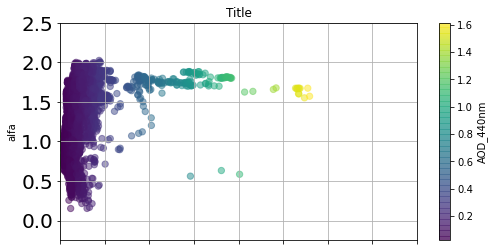

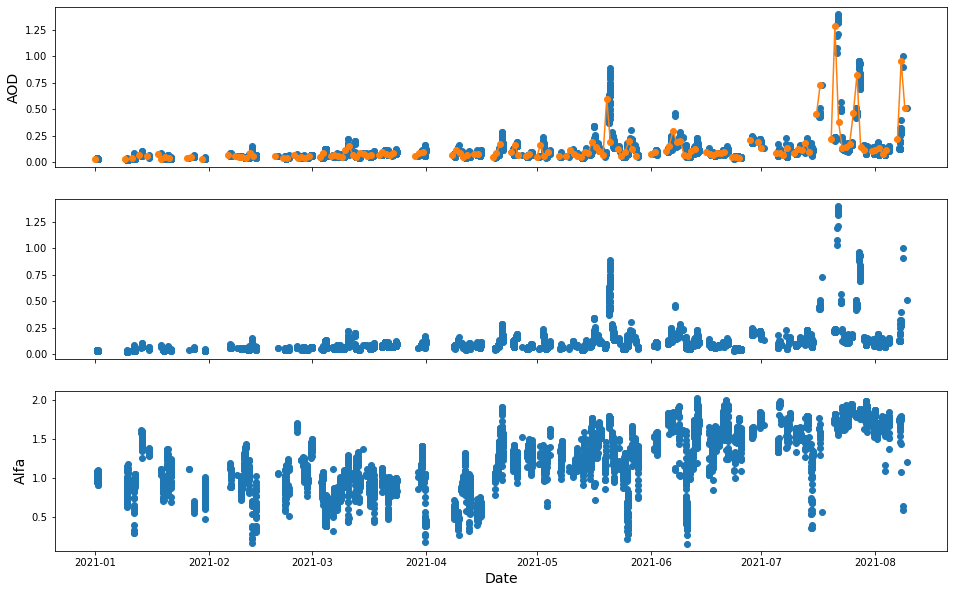

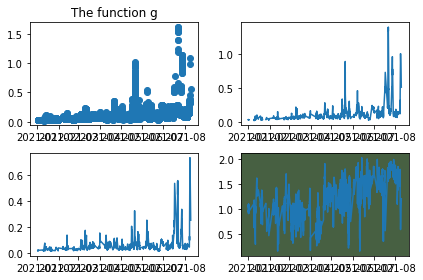

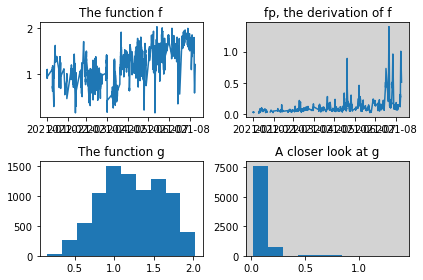

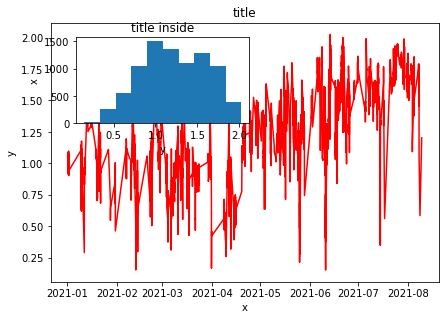

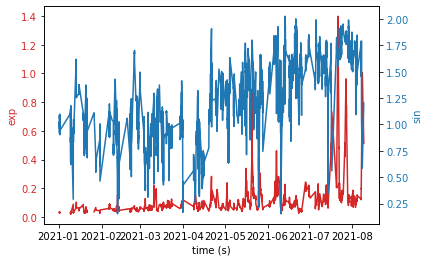

Text(0.5, 1.0, 'Simple plot')

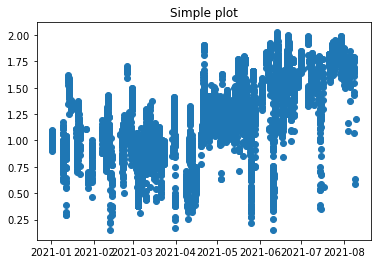

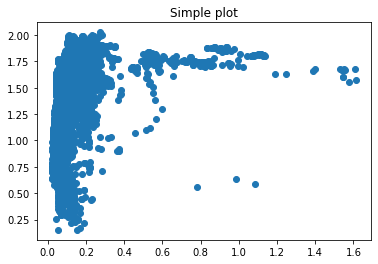

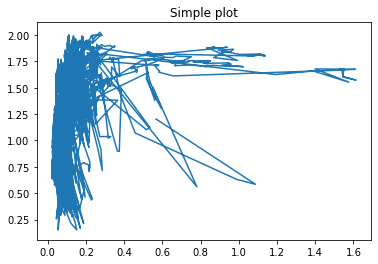

In [104]:
#####This code reads an Aeronet File_Name.LevXX file which has to be previously changed to File_Name.cvs


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy as sp
%matplotlib inline
from scipy.fftpack import fft, ifft


df = pd.read_csv('D:\SERGIO\Python\Halifax_20210101_20211231.csv', header = 6, na_values=(-999))  ## na_values=(-999)    ##### read AERONET data file

##### reads name and coordinates of the site

Latitude = df["Site_Latitude(Degrees)"][1]
Longitude = df["Site_Longitude(Degrees)"][1]
Elevation = df["Site_Elevation(m)"][1]
site = df["AERONET_Site_Name"][1]

##### prints name and coordinates of the site

print("Site :", site)
print("Site Coordinates (Lat_deg,Lon_deg, alt_m) :", Latitude, Longitude, Elevation)



#df = df[["Date(dd:mm:yyyy)", "Time(hh:mm:ss)","Day_of_Year", 
#                  "Day_of_Year(Fraction)", "AOD_870nm", "AOD_675nm", 
#                  "AOD_440nm", "440-870_Angstrom_Exponent"]]


print ('initial data size : ', df.shape)
#print ('-_-_-'*13)
#print ('-'*2)
#print ('-'*2)



####### Data cleaning
df['Date(dd:mm:yyyy)'] = df['Date(dd:mm:yyyy)'].str.replace(':','-')

df["Datetime"] = df["Date(dd:mm:yyyy)"] + " " + df["Time(hh:mm:ss)"]

df["Datetime"] = pd.to_datetime(df["Datetime"], dayfirst=True)

#df['Year'] = pd.DatetimeIndex(df.index).year
#df['Month'] = pd.DatetimeIndex(df.index).month

print ('Initial Date : ',df["Datetime"].min())
print ('Final Date : ',df["Datetime"].max())
#print(df["Datetime"].min(), df["Datetime"].max())
print('data series length :',df["Datetime"].max() - df["Datetime"].min())


print ('-'*2)



###############################################3####################################### these lines were substituted by na_values=(-999) in the file reading
#df = df.replace([-999.0],"NaN")  ## replace -999 aeronet flag by NaN in the data columns

#df = df.astype({"Day_of_Year(Fraction)" : float})
#df = df.astype({"AOD_440nm" : float})
#df = df.astype({"AOD_500nm" : float})
#df = df.astype({"AOD_870nm" : float})
#df = df.astype({"AOD_675nm" : float})
#df = df.astype({"440-870_Angstrom_Exponent" : float})


use_cols = ["Datetime","Day_of_Year", 
                  "Day_of_Year(Fraction)", "AOD_870nm", "AOD_675nm", 
                  "AOD_500nm", "AOD_440nm", "440-870_Angstrom_Exponent"]


df = df[use_cols]

df= df.set_index('Datetime')



## adding 2 columns with the year yyyy and month mm
df['Year'] = pd.DatetimeIndex(df.index).year
df['Month'] = pd.DatetimeIndex(df.index).month


df.columns = ["Day_of_Year", 
                  "Day_of_Year_f", "AOD_870nm", "AOD_675nm", 
                  "AOD_500nm", "AOD_440nm", "Ang_Exp",'Year', 'Month']



##############################################################
##############################################################
##############################################################







####### Basic descriptive statistics on the columns

perc =[0.01, 0.05, 0.10, .25, .50, .75, .90, 0.95, 0.99]
stat=df.describe(percentiles = perc)
print(stat)
#print(stat.dtypes)
#stats.head()
print ('-'*2)
print ('-'*2)
print ('-'*2)
######## Downsampling method###############
cols_ave = ["AOD_870nm", "AOD_675nm", "AOD_500nm", 
                  "AOD_440nm", "Ang_Exp"]
# Resample to weekly frequency, aggregating with mean

df_weekly = df[cols_ave].resample('W').mean()
#df_weekly.head(10)
df_monthly = df[cols_ave].resample('M').mean()
#df_monthly.head(10)
df_daily = df[cols_ave].resample('D').mean()
#df_daily.head(10)
df_year = df[cols_ave].resample('A').mean()
#df_daily.head(10)





######## Rolling average method###############
rol_win = df[cols_ave].rolling(20, center=True).mean()
rol_std = df[cols_ave].rolling(20, center=True).std()
#opsd_7d.head(40)




#####################################
######  Plots   ###########################################################################333######################################################333
######################################################333######################################################333
fig0 = df.plot.scatter(x='AOD_500nm', y="Ang_Exp", fontsize = 20, marker = "o", s=40, alpha = 0.5, ylim=(-0.25, 2.5), 
                xlim=(0, 2.0), c='AOD_440nm',colormap='viridis', figsize=(8,4), 
                grid=True, title = 'Title', xlabel="2013", ylabel='alfa') 

#fig0, ax = plt.subplots()
#ax.plot(df.AOD_440nm, df.Ang_Exp, marker='o', linestyle=' ')
#ax.set_title('Simple plot')

###################################################
###################################################

#fig1, (ax1, ax2, ax3) = plt.subplots(1, 3, 
#                             sharey=True, figsize=(16,4))

#ax1.plot(df.AOD_440nm, df.Ang_Exp, marker='o', linestyle=' ')
#ax2.plot(df.AOD_870nm, df.AOD_440nm)
#ax3.plot(df.AOD_870nm, df.AOD_440nm)


#####################################
######  Plots   #####################
######################################################333
#df.plot.scatter(x="AOD_500nm", y="AOD_870nm", marker = "o", s=40, alpha = 0.5, ylim=(0, 2), 
#                xlim=(0, 2.0), c='Ang_Exp',colormap='viridis', figsize=(8,4), 
#                grid=True, title = 'Title', xlabel='AOD (500nm)', ylabel='AOD (870nm)')

fig2, ax = plt.subplots(3,1,sharex=True, figsize=(16,10))
 

ax[0].plot(df.index, df.AOD_500nm, marker='o', linestyle=' ')
ax[0].plot(df_daily.index, df_daily.AOD_500nm, marker='o', linestyle='-')
ax[0].set_ylabel("AOD", fontsize=14)


ax[1].plot(df.index, df.AOD_500nm, marker='o', linestyle=' ')

ax[2].plot(df.index, df.Ang_Exp, marker='o', linestyle=' ')
ax[2].set_xlabel("Date", fontsize=14)
ax[2].set_ylabel("Alfa", fontsize=14)
#####################################
######  Plots   #####################
######################################################333

python_course_green = "#476042"
fig3 = plt.figure(figsize=(6, 4))

sub1 = plt.subplot(2, 2, 1)
#sub1.set_xticks(())
#sub1.set_yticks(())
sub1.plot(df.index, df.AOD_440nm, marker='o', linestyle=' ')
sub1.set_title('The function g')
 

sub2 = plt.subplot(2, 2, 2)
#sub2.set_xticks(())
#sub2.set_yticks(())
sub2.plot(df.index, df.AOD_500nm)

sub3 = plt.subplot(2, 2, 3)
#sub3.set_xticks(())
#sub3.set_yticks(())
sub3.plot(df.index, df.AOD_870nm)

sub4 = plt.subplot(2, 2, 4, facecolor=python_course_green)
#sub4.set_xticks(())
#sub4.set_yticks(())
sub4.plot(df.index, df.Ang_Exp)

fig3.tight_layout()
plt.show()

#####################################
######  Plots   #####################
######################################################333
fig4 = plt.figure(figsize=(6, 4))



sub1 = fig4.add_subplot(221) # instead of plt.subplot(2, 2, 1)
sub1.set_title('The function f') # non OOP: plt.title('The function f')
sub1.plot(df.index, df.Ang_Exp)


sub2 = fig4.add_subplot(222, facecolor="lightgrey")
sub2.set_title('fp, the derivation of f')
sub2.plot(df.index, df.AOD_500nm)



sub3 = fig4.add_subplot(223)
sub3.set_title('The function g')
sub3.hist(df.Ang_Exp)


sub4 = fig4.add_subplot(224, facecolor="lightgrey")
sub4.set_title('A closer look at g')
#sub4.set_xticks([-0.2, -0.1, 0, 0.1, 0.2])
#sub4.set_yticks([-0.15, -0.1, 0, 0.1, 0.15])
sub4.hist(df.AOD_500nm)

plt.tight_layout()
plt.show()



#####################################
######  Plots   #####################
######################################################333
fig5 = plt.figure()

#X = [1, 2, 3, 4, 5, 6, 7]
#Y = [1, 3, 4, 2, 5, 8, 6]

axes1 = fig5.add_axes([0.1, 0.1, 0.9, 0.9]) # main axes
axes2 = fig5.add_axes([0.16, 0.65, 0.4, 0.3]) # inset axes

# main figure
axes1.plot(df.index, df.Ang_Exp, 'r')
axes1.set_xlabel('x')
axes1.set_ylabel('y')
axes1.set_title('title')

# insert
axes2.hist(df.Ang_Exp)
axes2.set_xlabel('y')
axes2.set_ylabel('x')
axes2.set_title('title inside');

fig6, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('exp', color=color)
ax1.plot(df.index, df.AOD_500nm, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
ax2.plot(df.index, df.Ang_Exp, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()



fig7, ax = plt.subplots()
ax.scatter(df.index, df.Ang_Exp)
ax.set_title('Simple plot')
#plt.show()


fig8, ax = plt.subplots()
ax.plot(df.AOD_440nm, df.Ang_Exp, marker='o', linestyle=' ')
ax.set_title('Simple plot')

fig9, ax = plt.subplots()
ax.plot(df.AOD_440nm, df.Ang_Exp)
ax.set_title('Simple plot')

#ax = df_daily.AOD_440nm.plot(title='Aerosol optical depth', linewidth=1, label='440 nm',c='blue')
#df_daily.AOD_500nm.plot(style="green", ax=ax , linewidth=1, label='500 nm')
#df_daily.AOD_870nm.plot(style="red", ax=ax, linewidth=1, label='440 nm')
#ax.set_ylabel("AOD")


#plt.savefig("temp_plot1.png", dpi=300)


############################################################################# 
#Aternative method for ploting several quantities in the same plot and axis
############################################################################# 

#fig, ax = plt.subplots(figsize=(6,3))

#ax.plot(df.AOD_500nm, marker='.', linestyle='-', linewidth=0.5, label='meas',c='g')
#ax.plot(df_daily.AOD_500nm, marker='o', linestyle='-', linewidth=3, label='Daily')
#ax.plot(df_weekly.AOD_500nm, marker='o', markersize=8, linestyle='-', linewidth=3, label='Weekly Mean Resample')
#ax.plot(df_monthly.AOD_500nm, marker='.', markersize=9, linestyle='-', linewidth=4,label='monthly',c='r')
#ax.plot(df.Ang_Exp, marker='.', linestyle='-', linewidth=0.5, label='meas',c='g')

#ax.set_ylabel('AOD_500nm')
#ax.legend();
#############################################################






#df.plot.scatter(x='AOD_500nm', y="Ang_Exp", marker = "o", s=40, alpha = 0.5, ylim=(-0.25, 2.5), 
#                xlim=(0, 2.0), c='AOD_440nm',colormap='viridis', figsize=(8,4), 
#                grid=True, title = 'Title', xlabel='AOD (500nm)', ylabel='alfa')

#df.plot.scatter(x="AOD_500nm", y="AOD_870nm", marker = "o", s=40, alpha = 0.5, ylim=(0, 2), 
#                xlim=(0, 2.0), c='Ang_Exp',colormap='viridis', figsize=(8,4), 
#                grid=True, title = 'Title', xlabel='AOD (500nm)', ylabel='AOD (870nm)')

#df_daily.plot.scatter(x="AOD_500nm", y="Ang_Exp", marker = "o", s=40, alpha = 0.5, ylim=(0, 2), 
#                xlim=(0, 2.0), c='Ang_Exp',colormap='viridis', figsize=(8,4), 
#                grid=True, title = 'Title', xlabel='AOD (500nm)', ylabel='AOD (870nm)')


#df.plot.scatter( x="Datetime",y="AOD_500nm", figsize=(20,7))
#df.plot(x = "Datetime", y = ["AOD_440nm", "AOD_870nm"], grid=True)
#df.hist(column='AOD_500nm', bins = 30,legend=True)
#df.hist(column='440-870_Angstrom_Exponent', bins = 50)
#df_monthly.AOD_500nm.plot()


#df_daily.head()
#df.head() 
#df.tail()


